In [2]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [35]:
#Import the LHC data using pickle.
signal_low_file = open("Lab_5_Data/higgs_100000_pt_250_500.pkl", "rb")
signal_low_dict = pickle.load(signal_low_file)

background_low_file = open("Lab_5_Data/qcd_100000_pt_250_500.pkl", "rb")
background_low_dict = pickle.load(background_low_file)

signal_high_file = open("Lab_5_Data/higgs_100000_pt_1000_1200.pkl", "rb")
signal_high_dict = pickle.load(signal_high_file)

background_high_file = open("Lab_5_Data/qcd_100000_pt_1000_1200.pkl", "rb")
background_high_dict = pickle.load(background_high_file)

#Store all our data together for easy access.
# data = [[signal_low_file, background_low_file], [signal_high_file, background_high_file]]
columns = background_low_dict.keys()
print(columns)

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


1.) Make two plots of Mass and d2 each with Signal and Background distributions. Describe the shape of the two distributions, commenting on the discrimination power of signal and background. Also make a 2D scatter plot between Mass and d2 for both signal and background.

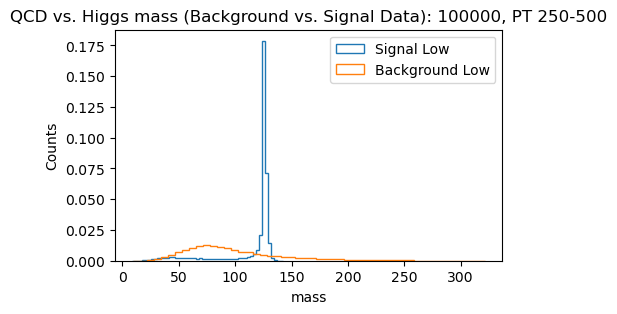

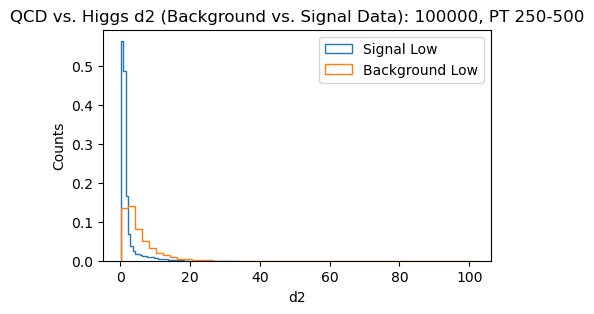

In [36]:
#Make some exploratory plots. Dictionary keys for the files are all the same, so we can just save them for one file, then loop over the
#remainder of the files in the same way we did for the first to more efficiently display everything without duplicating code.
for column in ['mass', 'd2']:
    cur_signal_data_low = signal_low_dict.get(column)
    cur_background_data_low = background_low_dict.get(column)

    #Background vs. signal for low pt.
    fig, ax = plt.subplots(1,1, figsize=(5,3))
    ax.hist(cur_signal_data_low, density=True, histtype="step", bins=50, label="Signal Low")
    ax.hist(cur_background_data_low, density=True, histtype="step", bins=50, label="Background Low")
    ax.set_title("QCD vs. Higgs " + column + " (Background vs. Signal Data): 100000, PT 250-500")
    ax.set_xlabel(column)
    ax.set_ylabel("Counts")
    ax.legend()

Text(0, 0.5, 'Counts')

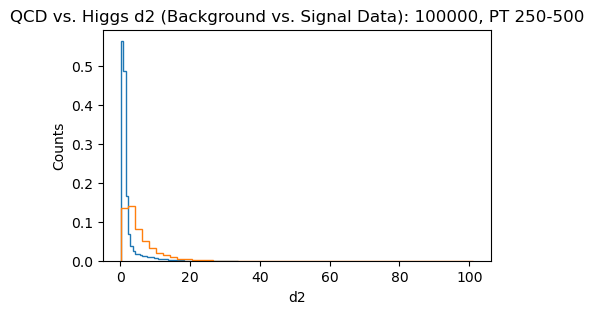

In [38]:
# TODO ^ (See above) Comment on the discrimination power of signal and background.
#Scatter plots

signal_mass_low = signal_low_dict.get("mass")
signal_d2_low = background_low_dict.get("d2")

background_mass_low = signal_low_dict.get("mass")
background_d2_low = background_low_dict.get("d2")

# TODO Scatter code below needs to be rewritten (accidentally deleted it)
#Background vs. signal for low pt.
fig, ax = plt.subplots(1,1, figsize=(5,3))
ax.hist(cur_signal_data_low, density=True, histtype="step", bins=50, label="Signal Low")
ax.hist(cur_background_data_low, density=True, histtype="step", bins=50, label="Background Low")
ax.set_title("QCD vs. Higgs " + column + " (Background vs. Signal Data): 100000, PT 250-500")
ax.set_xlabel(column)
ax.set_ylabel("Counts")

2.) Now assume a signal yield of 100 and a background yield of 20,000, re-weight the signal and background distribution such that they satisfy this yield. Then draw two histograms with the signal stacked on the background. Describe the visibility of observing the signal over the background.

In order to get a yield of 100, we multiply the weight values given in the example code accordingly.

AttributeError: 'list' object has no attribute 'shape'

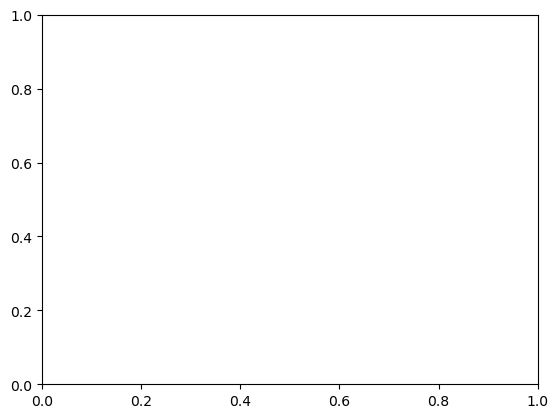

In [39]:
np.random.seed(42)
n_bins = 100
mass_d2 = [signal_mass_low, signal_d2_low]

fig, ax = plt.subplots(nrows=1, ncols=1)

custom_weight = 0.1
weighted_signal_mass_low_inbin, weighted_signal_mass_low_bins, _ = ax.hist(mass_d2, n_bins, density=False, histtype='bar', weights= custom_weight * np.ones(mass_d2.shape[0]))
ax.set_title('weighted histogram')
print(f"weighted: the yield is {np.sum(weighted_signal_mass_low_inbin)}, the area is {np.sum(weighted_signal_mass_low_inbin) * (weighted_signal_mass_low_bins[1] - weighted_signal_mass_low_bins[0]) }")

print(f"The shape of the Mass + d2 data is {mass_d2.shape}")

# Part 2 - HERA Data